<a href="https://colab.research.google.com/github/AAA123404/Financial-big-data-analysis/blob/main/week6%E4%BD%9C%E6%A5%AD_%E6%99%82%E9%96%93%E5%BA%8F%E5%88%97%E3%80%81%E9%87%8F%E5%8C%96%E4%BA%A4%E6%98%93%E7%AD%96%E7%95%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###1. 使用Python建立ARIMA模型，預測股票價格，並進行可視化。




In [30]:
#pip install yfinance statsmodels matplotlib

In [25]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
#!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

#import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

##matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
#matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-10-22 10:40:21--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.143.113, 74.125.143.100, 74.125.143.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.143.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-10-22 10:40:21--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.218.132, 2a00:1450:4013:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.218.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  26.1MB/s    in 0.8s    

2024-10-22 10:4

In [26]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [27]:
stock_id = "2330.tw"
end = dt.date.today()
start = end - dt.timedelta(days=180)

df = yf.download(stock_id, start=start, end=end).reset_index()


close_prices = df['Close']
close_prices


[*********************100%***********************]  1 of 1 completed


,Close
0,766.0
1,782.0
2,795.0
3,790.0
4,772.0
...,...
115,1070.0
116,1045.0
117,1035.0
118,1085.0


In [28]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-04-25,770.0,774.0,765.0,766.0,759.663086,28534926
1,2024-04-26,788.0,789.0,782.0,782.0,775.530762,32571247
2,2024-04-29,790.0,795.0,787.0,795.0,788.423218,26765837
3,2024-04-30,797.0,802.0,790.0,790.0,783.464539,39051972
4,2024-05-02,789.0,789.0,772.0,772.0,765.613403,40527228
...,...,...,...,...,...,...,...
115,2024-10-15,1050.0,1075.0,1050.0,1070.0,1070.000000,42850176
116,2024-10-16,1040.0,1070.0,1035.0,1045.0,1045.000000,52652149
117,2024-10-17,1050.0,1055.0,1030.0,1035.0,1035.000000,54173771
118,2024-10-18,1095.0,1100.0,1075.0,1085.0,1085.000000,85011961


In [29]:
#pip install pmdarima

In [31]:
from pmdarima.arima import ndiffs
df = df.set_index("Date")
d =  ndiffs(df['Close'],  test="adf")
print(d)

1


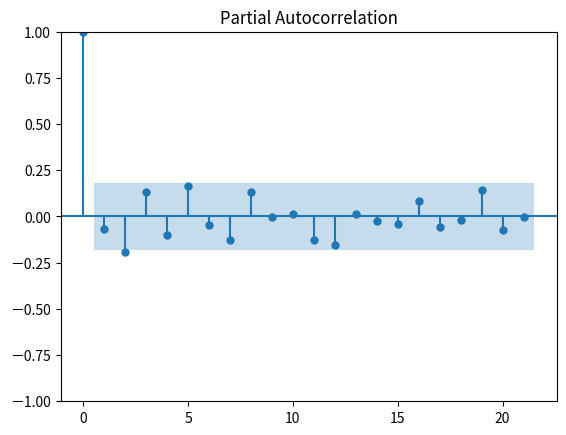

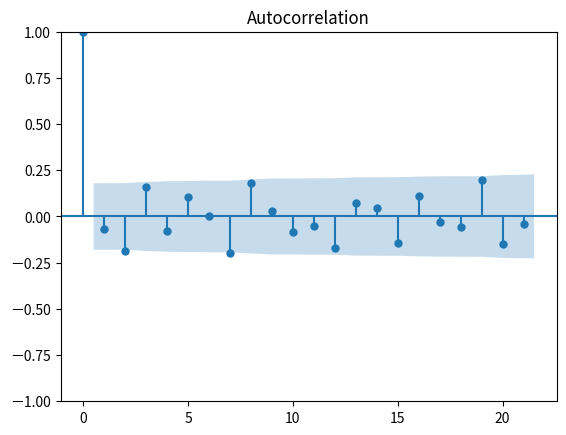

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(df['Close'].diff(1).dropna())
plt.show()
plot_acf(df['Close'].diff(1).dropna())
plt.show()

In [34]:
train_size = int(len(close_prices) * 0.7)
train, test = close_prices[:train_size],close_prices[train_size:]
print(f"訓練集長度: {len(train)}")
print(f"測試集長度: {len(test)}")

訓練集長度: 84
測試集長度: 36


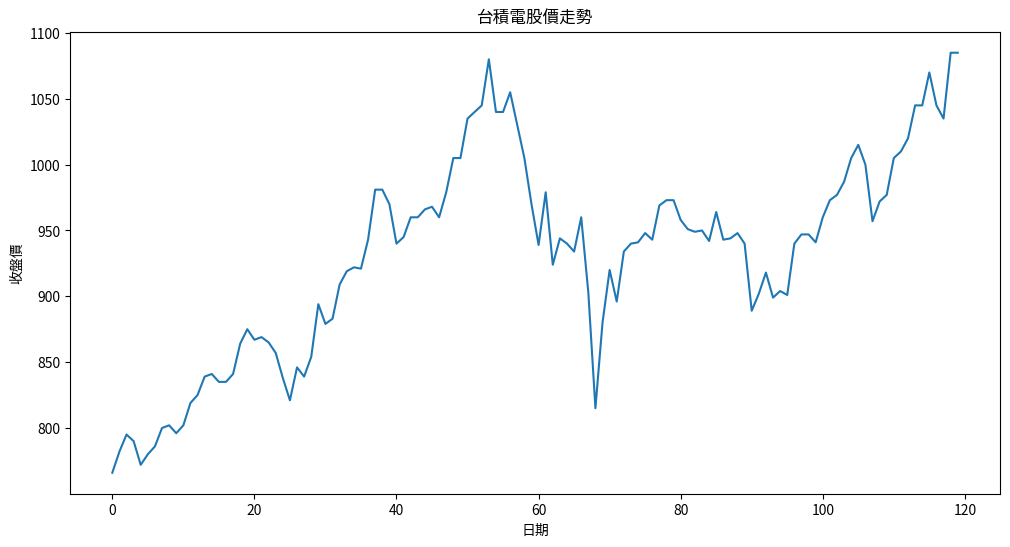

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(close_prices)
plt.title('台積電股價走勢')
plt.xlabel('日期')
plt.ylabel('收盤價')
plt.show()


In [35]:
#ADF檢定-檢查平穩性
from statsmodels.tsa.stattools import adfuller
result = adfuller(close_prices)
print('ADF 統計量：', result[0])
print('p-value：', result[1]) #如果 p-value < 0.05，則數據是平穩的；否則，需要進行差分處理

ADF 統計量： -1.7244340469175465
p-value： 0.4185693186340955


In [36]:
data_diff = close_prices.diff().dropna()
# 再次進行 ADF 檢定
result = adfuller(data_diff)
print('ADF 統計量（差分後）：', result[0])
print('p-value（差分後）：', result[1])

ADF 統計量（差分後）： -6.082529001507849
p-value（差分後）： 1.0835771588773833e-07


In [37]:
def optimize_arima(train, p_values, d_values, q_values):
  best_score, best_cfg = float("inf"), None
  best_model = None
  # 使用迴圈迭代 p, d, q 組合找出最佳參數
  for p in p_values:
    for d in d_values:
      for q in q_values:
        try:
          model = ARIMA(train, order=(p, d, q))
          model_fit = model.fit()
          yhat = model_fit.forecast(steps=len(test))
          error = mean_squared_error(test, yhat)
          if error < best_score:
            best_score, best_cfg = error, (p, d, q)
            best_model = model_fit
        except:
            continue
  return best_cfg, best_model

In [ ]:
# 定義 p, d, q 參數範圍
p_values = range(0, 6) #範圍0~5
d_values = range(0, 3) #範圍0~2
q_values = range(0, 6) #範圍0~5
# 找出 ARIMA 模型最佳參數
best_cfg, best_model = optimize_arima(train, p_values,
d_values, q_values)
# 印出最佳参数
print(f'最佳參數 {best_cfg}')

In [39]:
from math import sqrt
# 預測
yhat = best_model.forecast(steps=len(test))
# 計算誤差RMSE
rmse_optimized = sqrt(mean_squared_error(test, yhat))
# 印出誤差RMSE
print(f"RMSE: {rmse_optimized}")

RMSE: 36.78057582469688


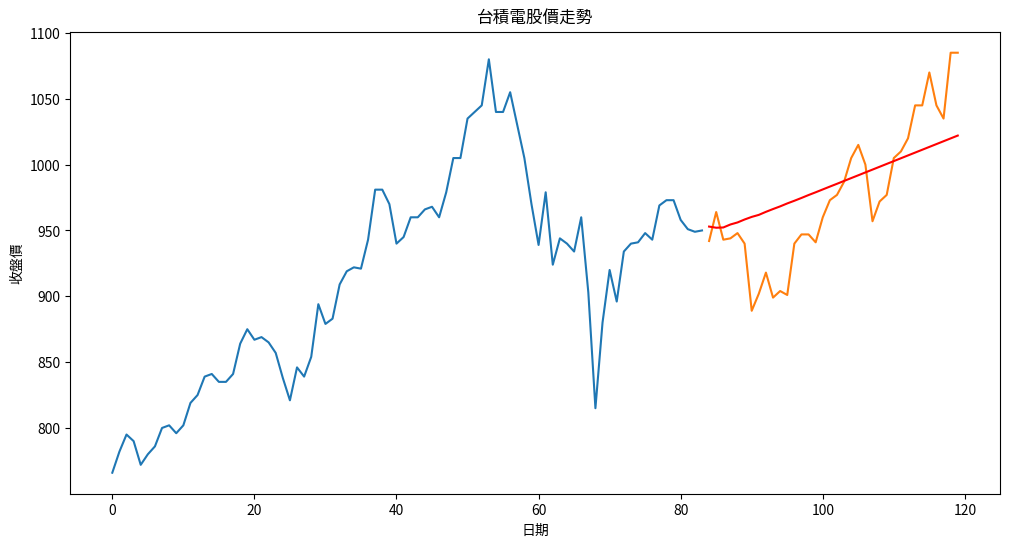

In [43]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train)
plt.plot(test.index, test)
plt.plot(test.index, yhat, color='red')
plt.title('台積電股價走勢')
plt.xlabel('日期')
plt.ylabel('收盤價')
plt.show()

In [44]:
# AR1 模型
ar1_model = ARIMA(train, order=(1, 0, 0)).fit()
ar1_pred = ar1_model.forecast(steps=len(test))
ar1_rmse = np.sqrt(mean_squared_error(test, ar1_pred))
print(f"AR1 RMSE: {ar1_rmse}")
# AR2 模型
ar2_model = ARIMA(train, order=(2, 0, 0)).fit()
ar2_pred = ar2_model.forecast(steps=len(test))
ar2_rmse = np.sqrt(mean_squared_error(test, ar2_pred))
print(f"AR2 RMSE: {ar2_rmse}")
# AR3 模型
ar3_model = ARIMA(train, order=(3, 0, 0)).fit()
ar3_pred = ar3_model.forecast(steps=len(test))
ar3_rmse = np.sqrt(mean_squared_error(test, ar3_pred))
print(f"AR3 RMSE: {ar3_rmse}")


AR1 RMSE: 82.4784926452978
AR2 RMSE: 81.75310765390239
AR3 RMSE: 77.71075630208072
